In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
from scipy.io import loadmat 

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_path = Path('/home/jovyan/shared/data/pungor-etal-2023-octopus/')

In [7]:
!ls $data_path

md5sums.txt		     PungorCB_100719_dataset.mat
PungorCB_073019_dataset.mat  PungorCB_100919_dataset.mat
PungorCB_080819_dataset.mat  README.md
PungorCB_082219_dataset.mat  SOURCE.txt
PungorCB_100219_dataset.mat


In [8]:
# below is the rendered readme content 
from IPython.display import Markdown, display

display(Markdown(data_path/"README.md"))


# Calcium imaging data from Pungor et al 2023, Functional organization of visual responses in the octopus optic lobe

***

This dataset contains calcium imaging data from the octopus optic lobe, measured during presentation of a sparse noise stimulus. The data files include dF/F traces for all identified units and associated receptive fields and size tuning curve traces.

## Description of the Data and file structure

**6 imaging sessions**
PungorCB\_073019\_dataset.mat
PungorCB\_080819\_dataset.mat
PungorCB\_082219\_dataset.mat
PungorCB\_100219\_dataset.mat
PungorCB\_100719\_dataset.mat
PungorCB\_100919\_dataset.mat

**Variables for each session**

*stimFrames*(movieFrame)		
onset of each movie frame, in acquisition frames

*dF*(unit,frame) 		 	
dF/F0 for each unit extracted, on each acq frame

*xpts*(units), ypts(unit)		
x,y pixel location of each unit

*stas*(x,y,unit,on/off)	
2-D STA receptive field for each unit, for ON and OFF components

*rfx*(unit,on/off), *rfy*(unit,on/off)	
x and y location of receptive field peak for each unit, for ON and OFF components

*zscore*(unit, on/off)	
z-score of RF peak for each unit, for ON and OFF components

*tuning*(unit, on/off, size, t)	
response timecourse for each unit for ON,OFF at 4 sizes (3,6,12deg, full)

*xb*{layer}, *yb*{layer}	
boundary points demarcating region of each layer in the image

*moviedata*(x,y,frame) 		sparse noise stimulus

**Notes:**
Imaging framerate = 10Hz
Stimulus framerate = 1Hz
Pixel size = 2um/pixel

## Sharing/access Information

Links to other publicly accessible locations of the data:
n/a

Was data derived from another source?
No

In [9]:
data = loadmat(data_path / 'PungorCB_100719_dataset.mat')
data['xb'] = list(data['xb'][0])
data['yb'] = list(data['yb'][0])

In [10]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'dF', 'moviedata', 'rfx', 'rfy', 'stas', 'stimFrames', 'tuning', 'xb', 'xpts', 'yb', 'ypts', 'zscore'])

In [11]:
# print out the shapes
{k: v.shape if isinstance(v, np.ndarray) else len(v)
 for k, v in data.items() if not k.startswith('__')}

{'dF': (813, 6067),
 'moviedata': (256, 192, 600),
 'rfx': (813, 2),
 'rfy': (813, 2),
 'stas': (256, 192, 813, 2),
 'stimFrames': (604, 1),
 'tuning': (813, 2, 4, 21),
 'xb': 4,
 'xpts': (813, 1),
 'yb': 4,
 'ypts': (813, 1),
 'zscore': (813, 2)}

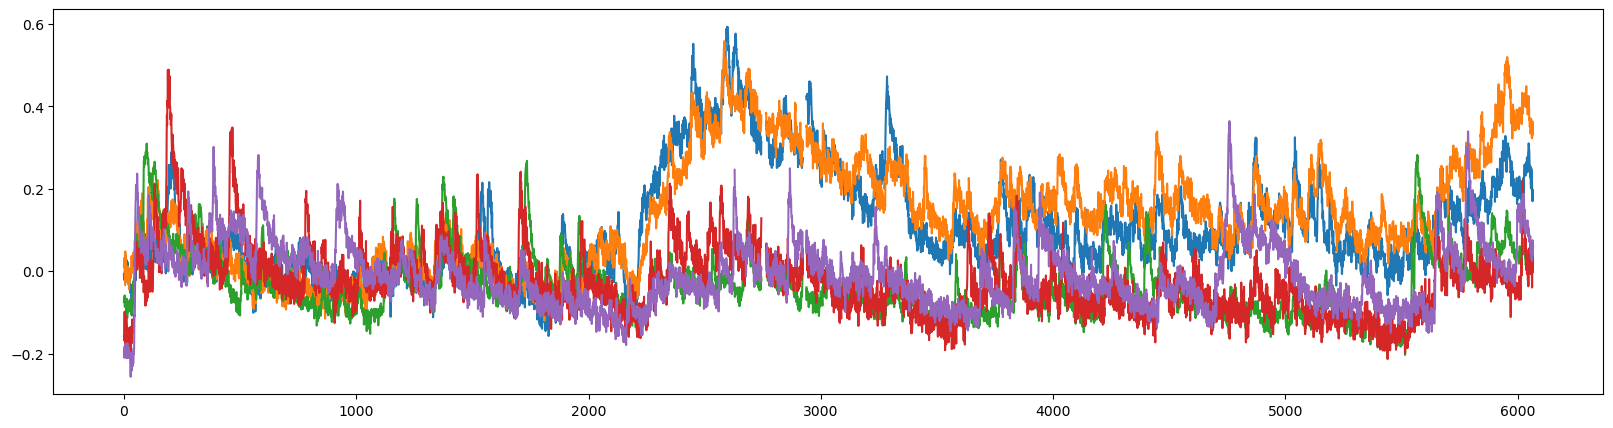

In [12]:
# plot a few ROI and their dF series
# the time vector has not been created yet, but can be using their given frame rate in the README
plt.figure(figsize=(20,5))
plt.plot(data['dF'][[20, 50, 200, 500, 600],:].T)
plt.show()

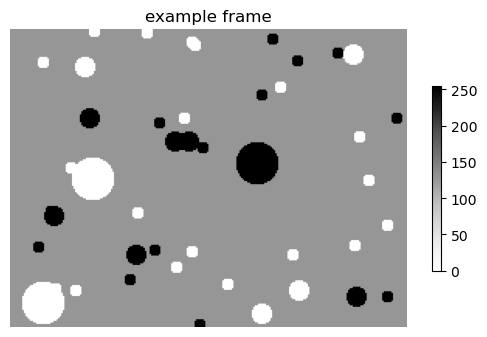

In [13]:
plt.imshow(data['moviedata'][:,:,5].T, cmap='Greys')
plt.axis('off')
plt.title('example frame')
plt.colorbar(shrink=0.5)

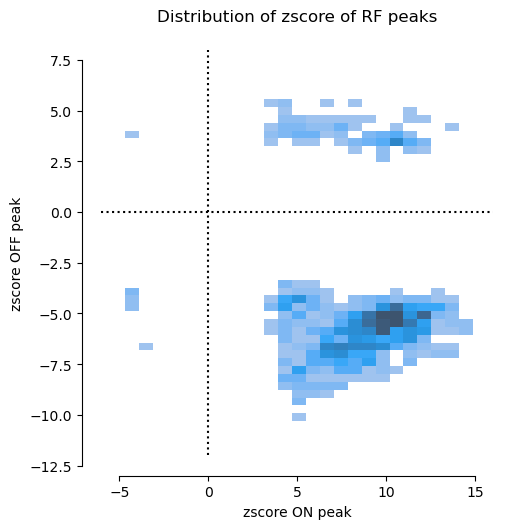

In [14]:
sns.displot(
    x=data['zscore'][:,0],
    y=data['zscore'][:,1],
    
)

plt.hlines(0,xmin=-6,xmax=16,colors='k',linestyle=':')
plt.vlines(0,ymin=-12,ymax=8,colors='k',linestyle=':')

plt.xlabel('zscore ON peak')
plt.ylabel('zscore OFF peak')
plt.title('Distribution of zscore of RF peaks')

sns.despine(trim=True)

plt.show()

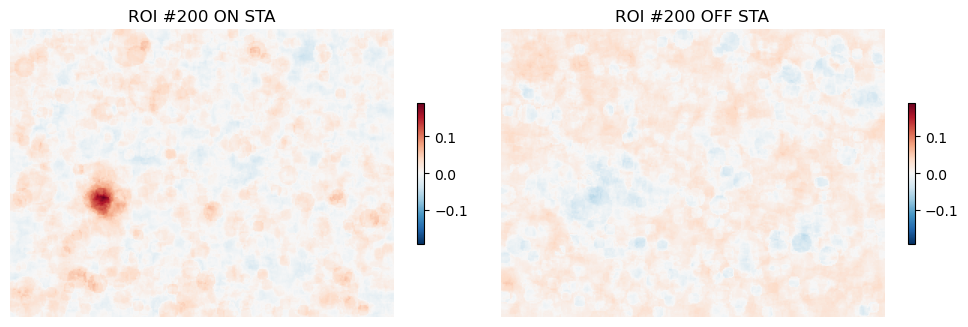

In [15]:
roi = 200

sta_upper = np.abs(data['stas'][:,:,roi,:]).max() 

plt.figure(figsize=(10, 5))

for i, sta_type in enumerate(['on', 'off']):
    sta_of_cell = data['stas'][:,:,roi,i]
    
    plt.subplot(1,2,i+1)
    plt.imshow(
        sta_of_cell.T, 
        vmin=-sta_upper,
        vmax=sta_upper,
        cmap='RdBu_r'
    )
    plt.axis('off')
    plt.title(f'ROI #{roi} {sta_type.upper()} STA')
    plt.colorbar(shrink=0.3)
plt.tight_layout()

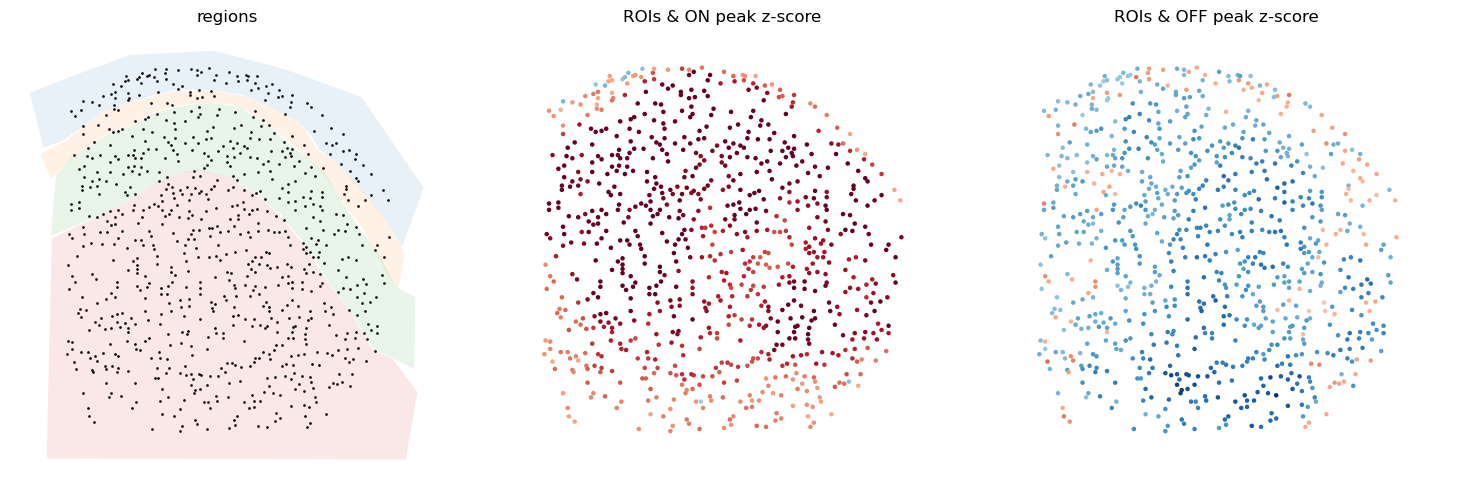

In [16]:
plt.figure(figsize=(15,5))

ax_layer = plt.subplot(1,3,1)
for i, (xb, yb) in enumerate(zip(data['xb'], data['yb'])):
    plt.fill(xb.squeeze(), yb.squeeze(), alpha=0.1)
plt.axis('off')
plt.scatter(data['xpts'].squeeze(), data['ypts'].squeeze(), s=1, c='k', alpha=0.9)
plt.gca().invert_yaxis()
plt.title('regions')


for i, sta_type in enumerate(['on', 'off']):
    plt.subplot(1,3,i+2, sharex=ax_layer, sharey=ax_layer)
    
    plt.scatter(
        data['xpts'].squeeze(),
        data['ypts'].squeeze(),
        s=5,
        c=data['zscore'][:,i],
        vmin=-10,
        vmax=10,
        cmap='RdBu_r',
    )
    plt.axis('off')
    plt.title(f'ROIs & {sta_type.upper()} peak z-score')

ax_layer.set_aspect(aspect='equal', adjustable='box')

plt.tight_layout()